<a href="https://colab.research.google.com/github/chaitanya-949/hawkeye/blob/main/classification_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual


# **GitHub Link -**

https://github.com/chaitanya-949/hawkeye/blob/main/classification_project_.ipynb

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

     

### Dataset Loading

In [3]:
# Load Dataset
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [5]:
# Dataset First Look
df = df.set_index(['id'])#making first column as my index
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(381109, 11)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

269

In [9]:
df.drop_duplicates( inplace=True)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

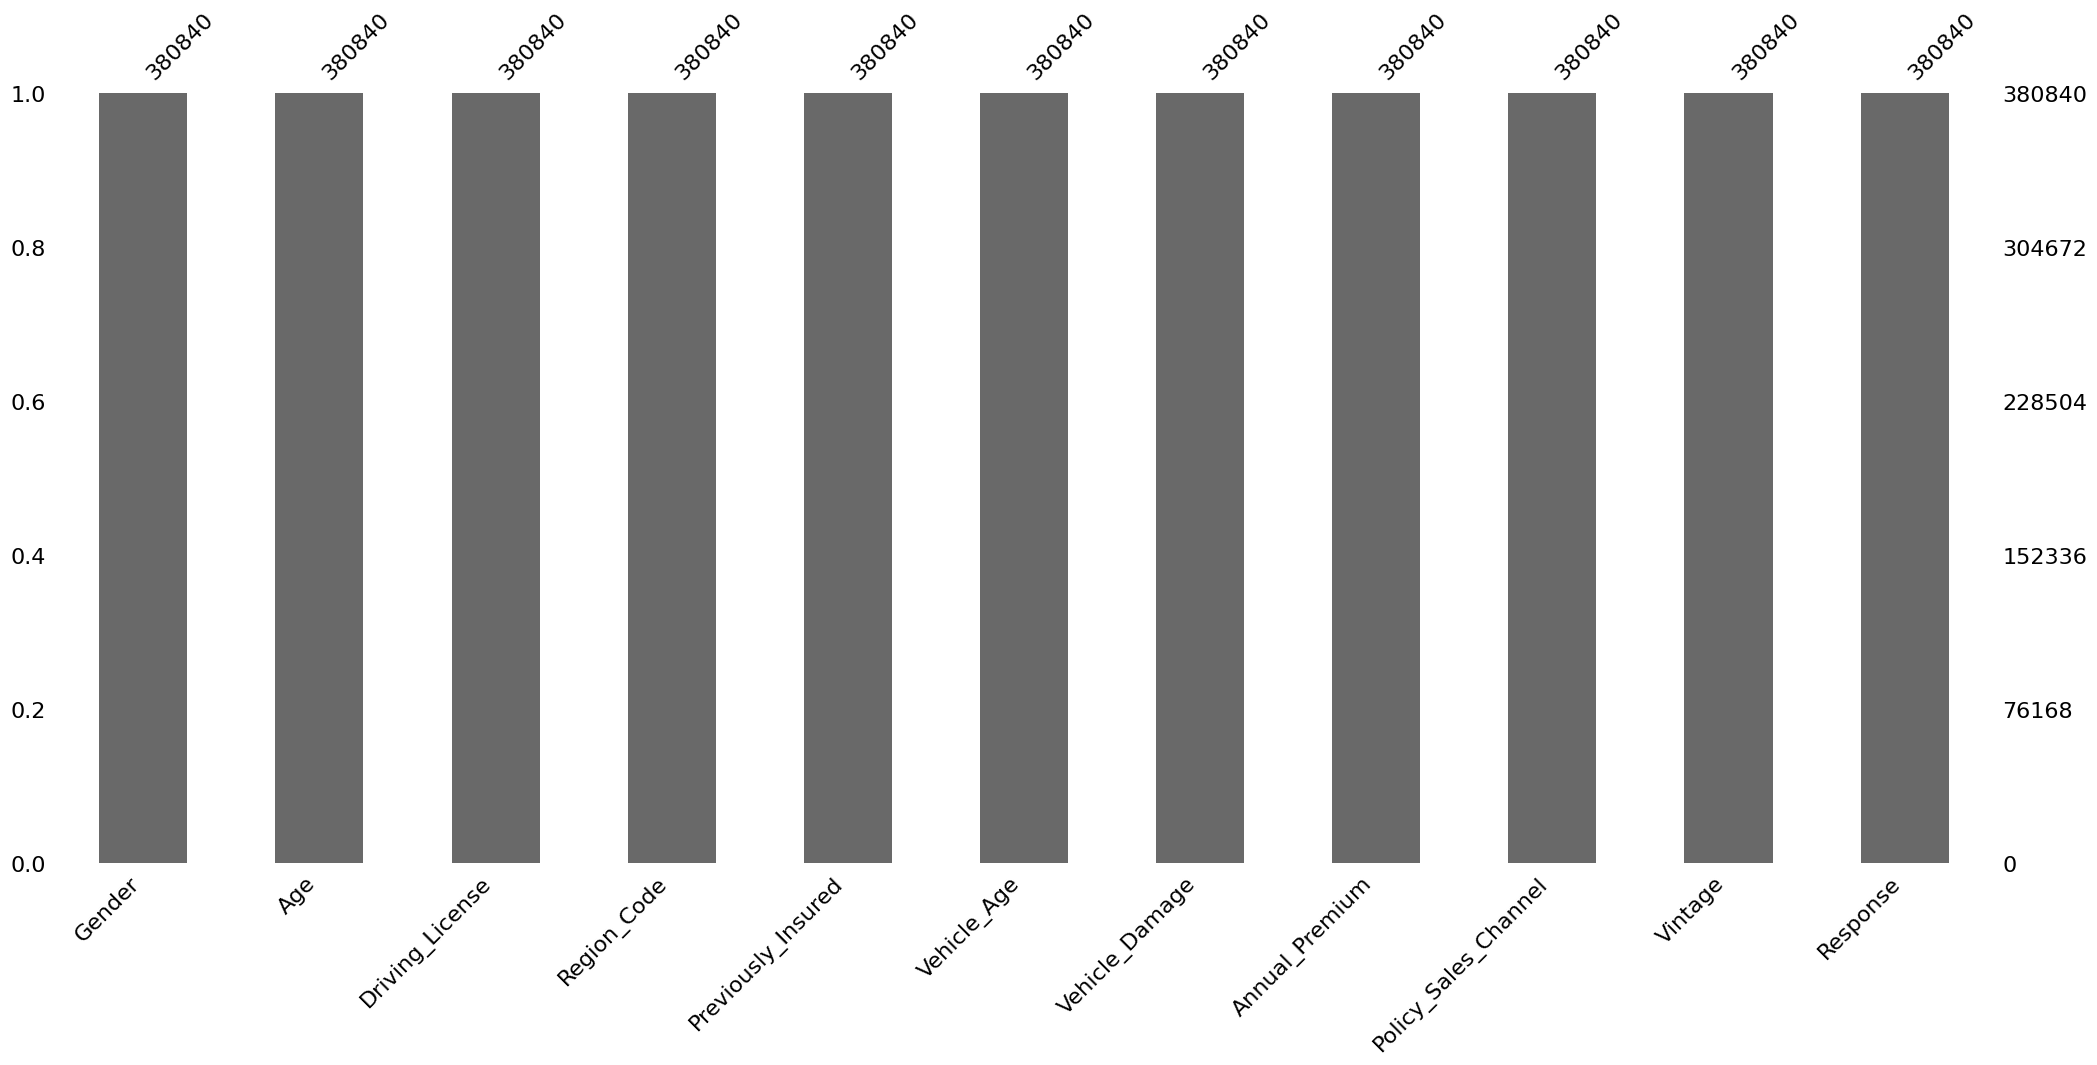

In [11]:
# Visualizing the missing values
msno.bar(df)
     

### What did you know about your dataset?

In this dataset, there exist 380840 rows and 11 columns after removing 269 duplicate values. there are no null values present in dataset

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description 

There are 11 different variables above shows the discriptive summary of float and int dtypes

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for col in df.columns:
  columns=df[col].unique()
  print(f'{col}={columns}')

Gender=['Male' 'Female']
Age=[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License=[1 0]
Region_Code=[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured=[0 1]
Vehicle_Age=['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage=['Yes' 'No']
Annual_Premium=[ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel=[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# separate categorical and numerical columns
cat_cols = []
num_cols = []
for col in df.columns:
        if df[col].nunique() <= 5:
            cat_cols.append(col)
       
        else:
          num_cols.append(col)

print("Categorical_columns:", cat_cols)
print("Numerical_columns:", num_cols)

Categorical_columns: ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Numerical_columns: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

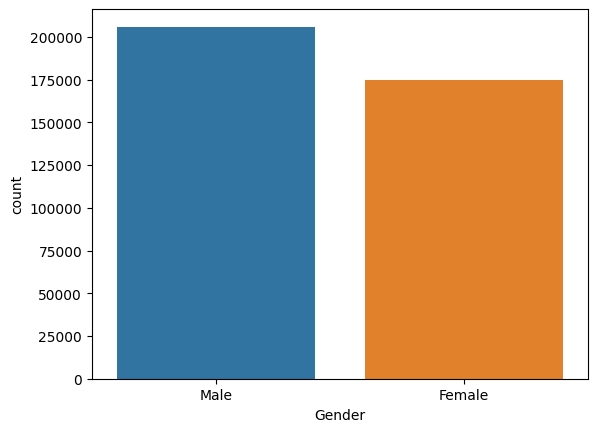

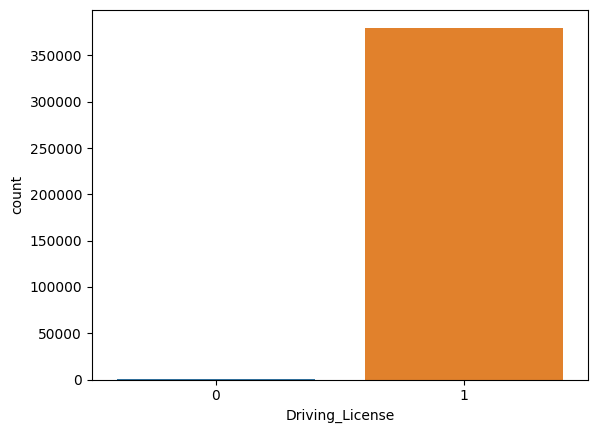

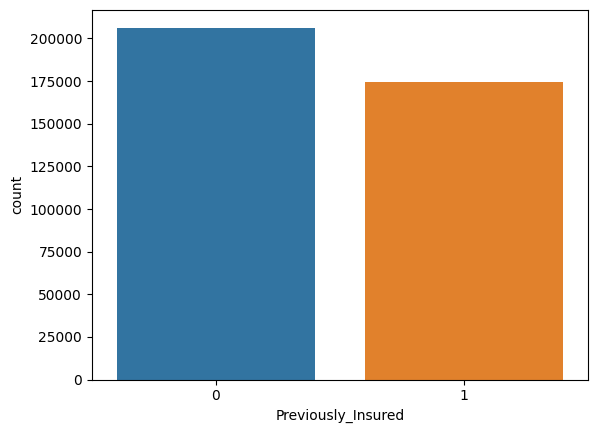

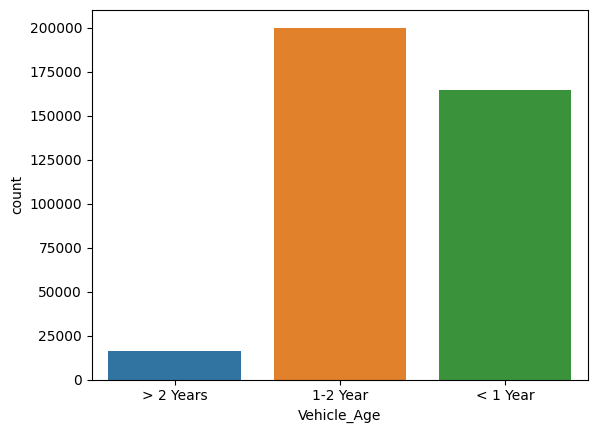

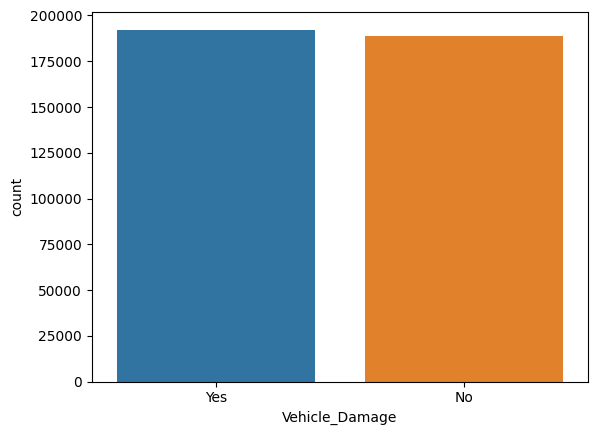

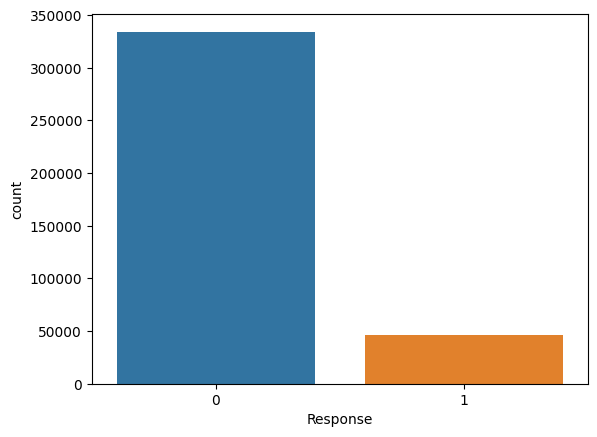

In [16]:
# Chart - 1 visualization code
for col in cat_cols:
 sns.countplot(x = df[col],data = df)
 #plt.title('male and female count')
 plt.show()

##### 1. Why did you pick the specific chart?

i have picked the countplot to show visually how the categorical variables are there

#### Chart - 2

In [17]:
# Chart - 2 visualization code


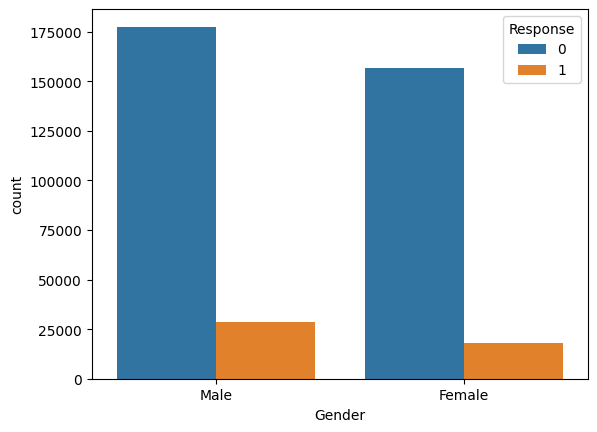

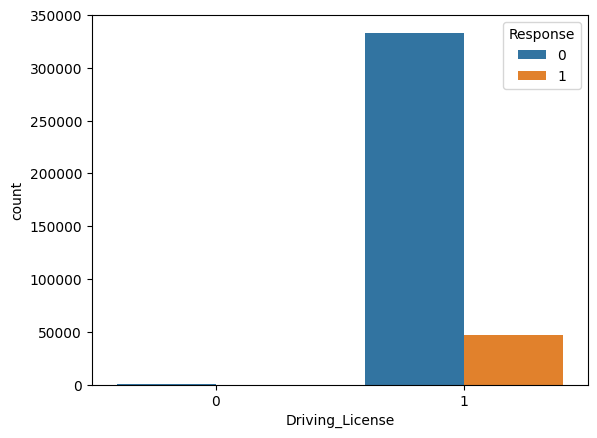

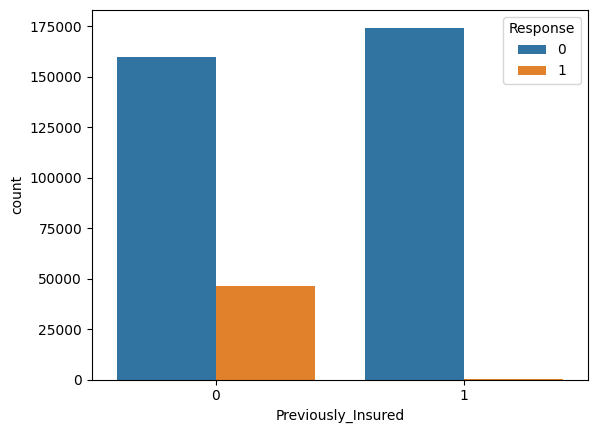

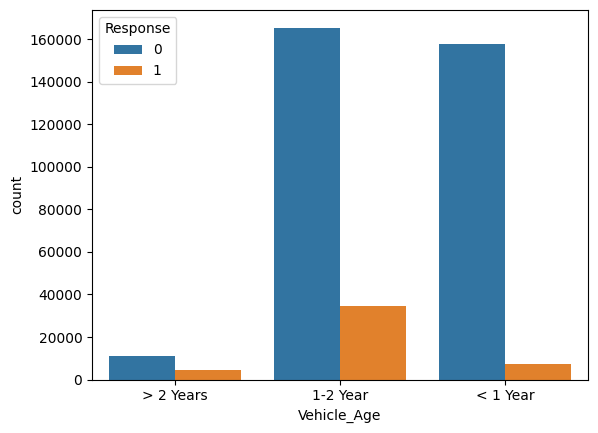

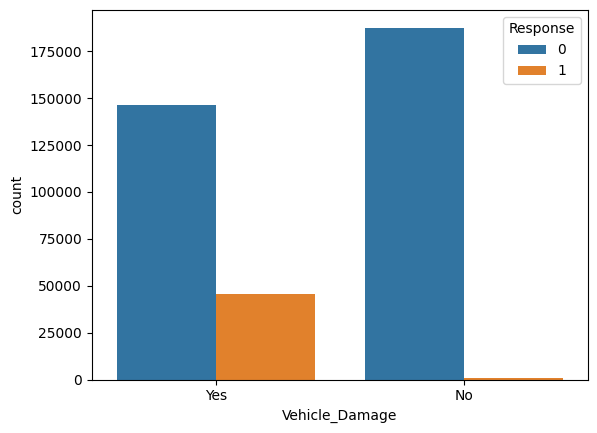

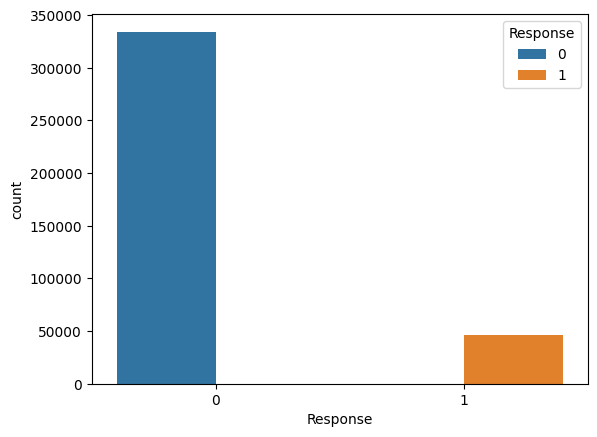

In [18]:
for col in cat_cols:
 sns.countplot(data=df, x=df[col], hue="Response")
 plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The gender variable in the dataset is almost equally distributed.
Male category is slightly greater than that of female and chances of buying the insurance is also little high.

Customers who are interested in Vehicle Insurance almost all have driving license


Customer who are not perviosly insured are likely to be inetrested

Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

Customers with with Vehicle_Age <1 years have very less chance of buying Insurance




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: xlabel='Age', ylabel='count'>

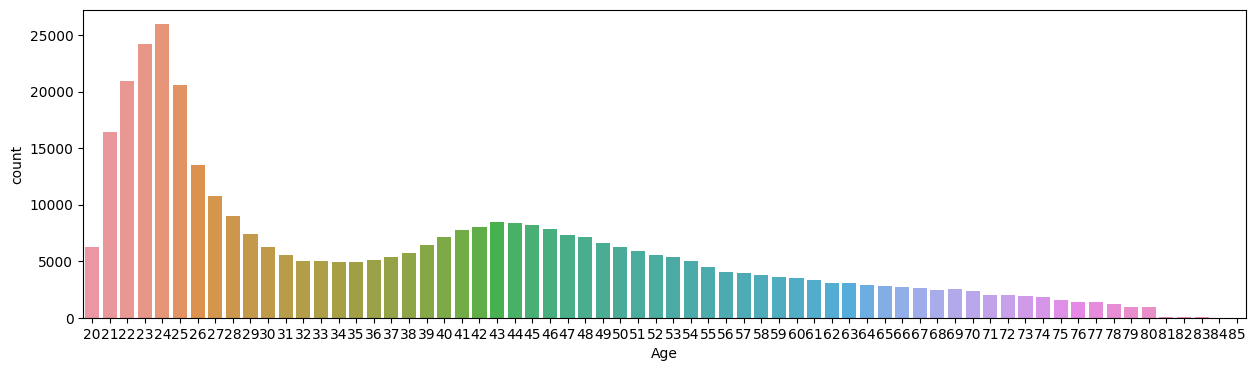

In [19]:
# Chart - 3 visualization code
plt.figure(figsize=(15,4))
sns.countplot(x=df['Age'],data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: xlabel='Age', ylabel='count'>

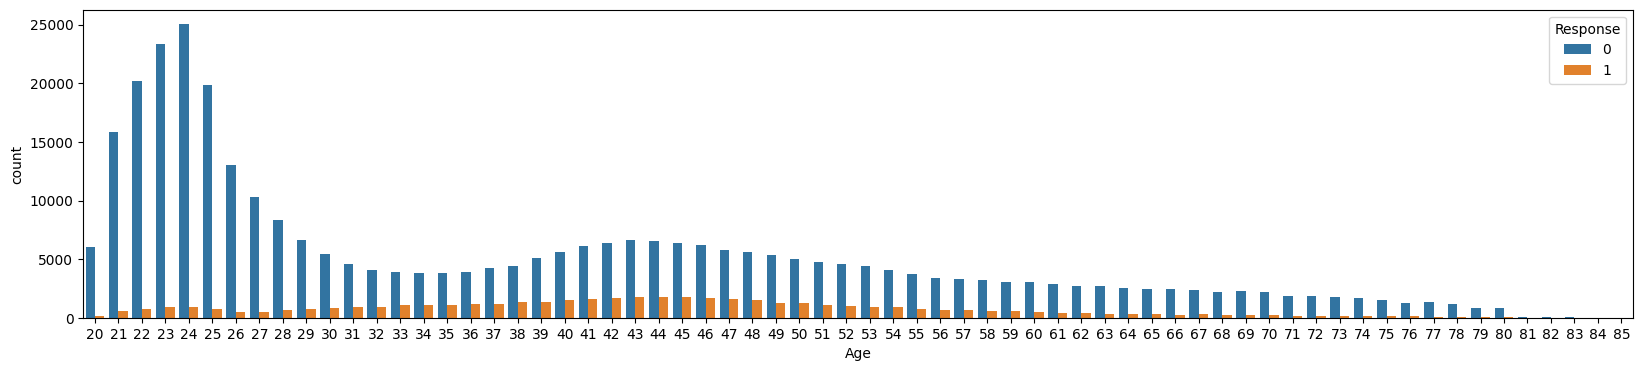

In [20]:
# Chart - 4 visualization code

#Age VS Response
plt.figure(figsize=(20,4))
sns.countplot(x='Age',hue='Response',data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

People aged between 30-60 are more likely to be interested.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

#### Chart - 7

<Axes: >

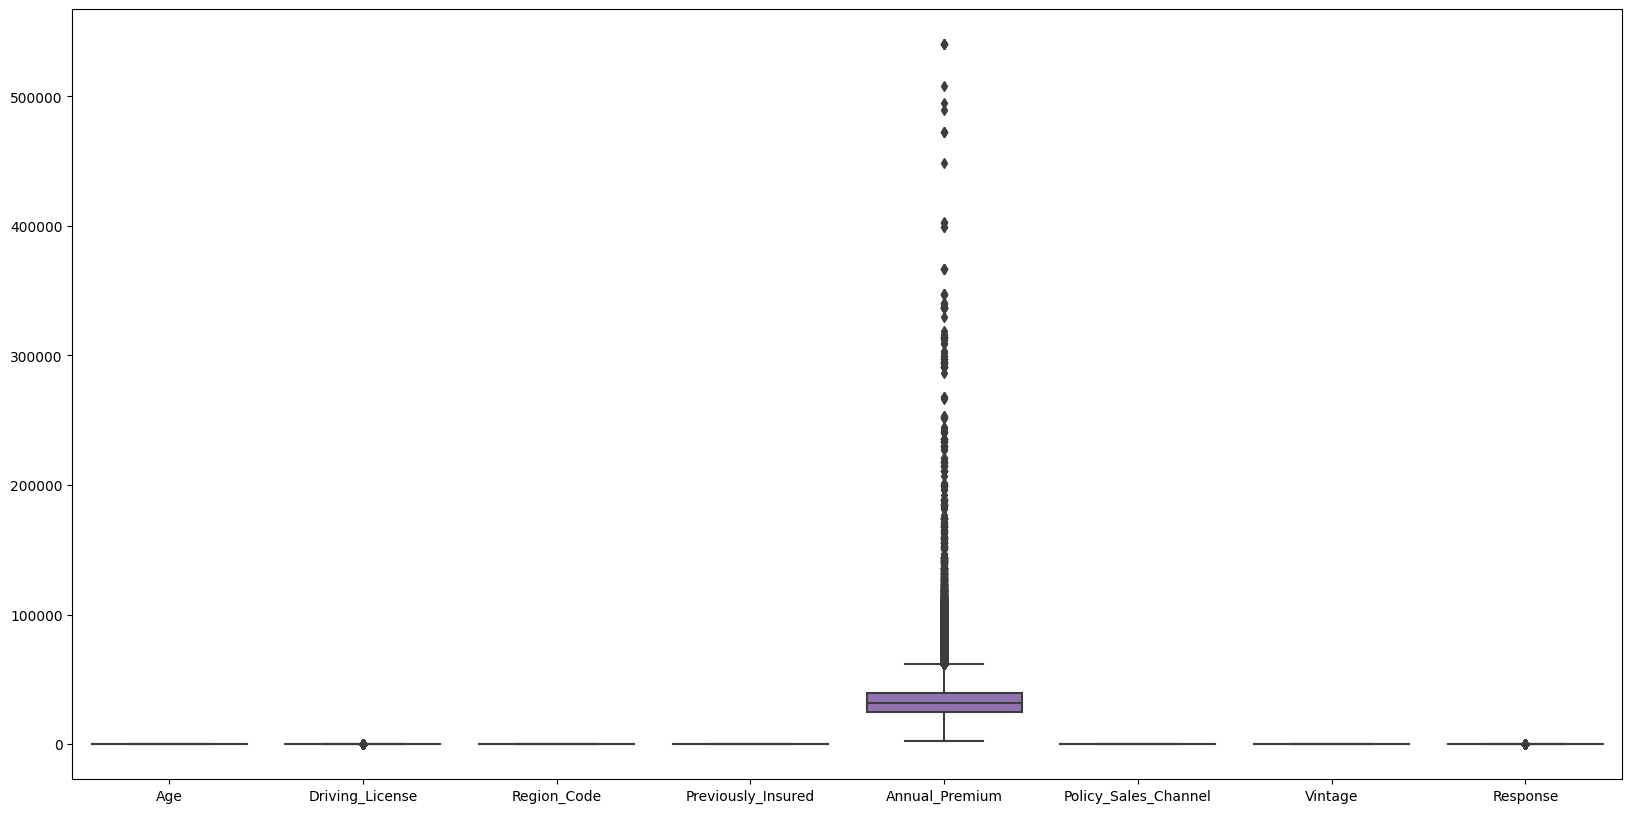

In [21]:
# Chart - 7 visualization code
plt.figure(figsize=(20,10))
sns.boxplot(df)

##### 1. Why did you pick the specific chart?

I have done boxplot to see the outliers

##### 2. What is/are the insight(s) found from the chart?

For the boxplot above we can see that there's a lot of outliers in the annual premium.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

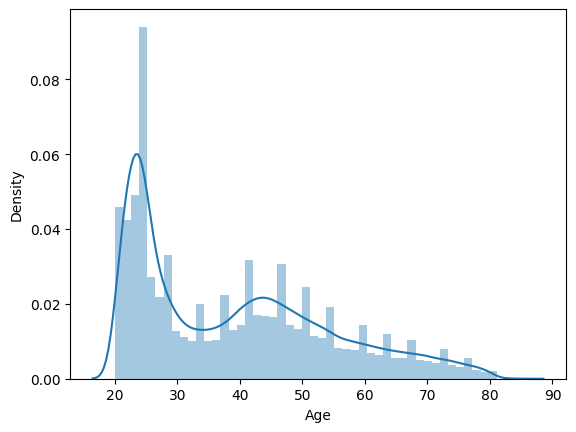

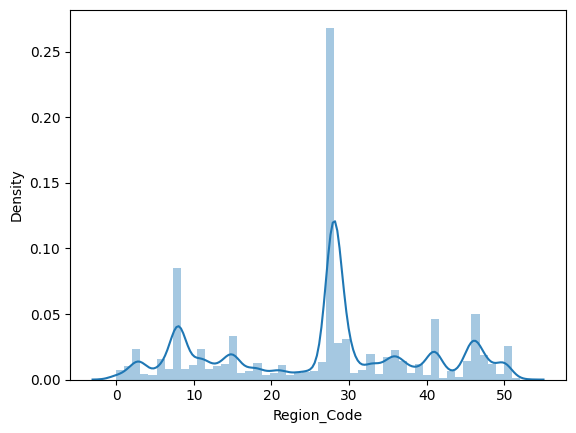

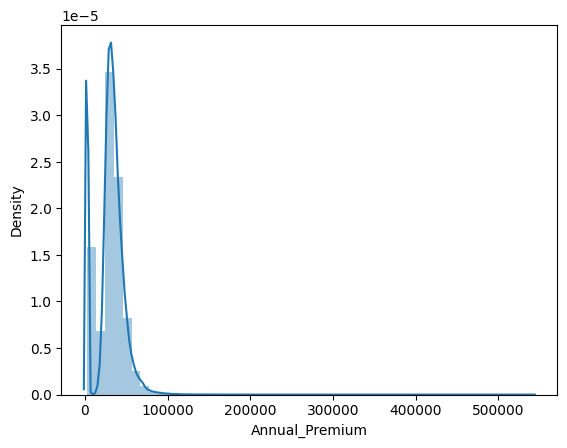

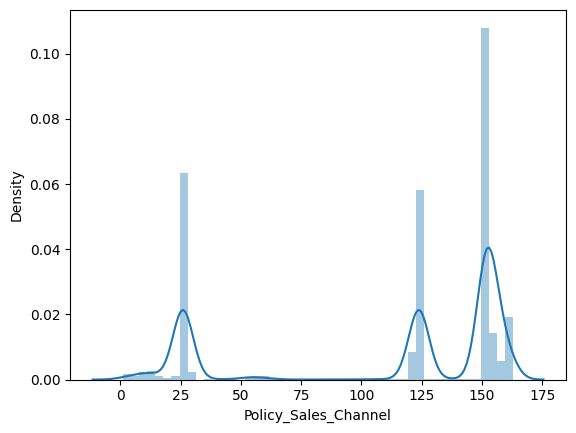

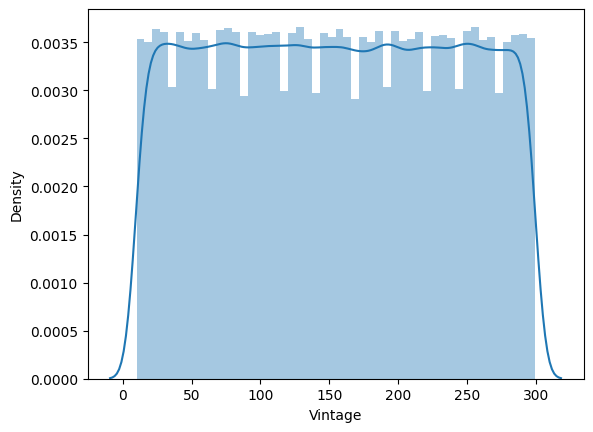

In [22]:
# Chart - 8 visualization code
for col in num_cols:
 sns.distplot(df[col])
 plt.show()

##### 1. Why did you pick the specific chart?

i have used distplot to know the skewness of the data

##### 2. What is/are the insight(s) found from the chart?

except vintage all numerical columns are highly skewed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 14 - Correlation Heatmap

<Axes: >

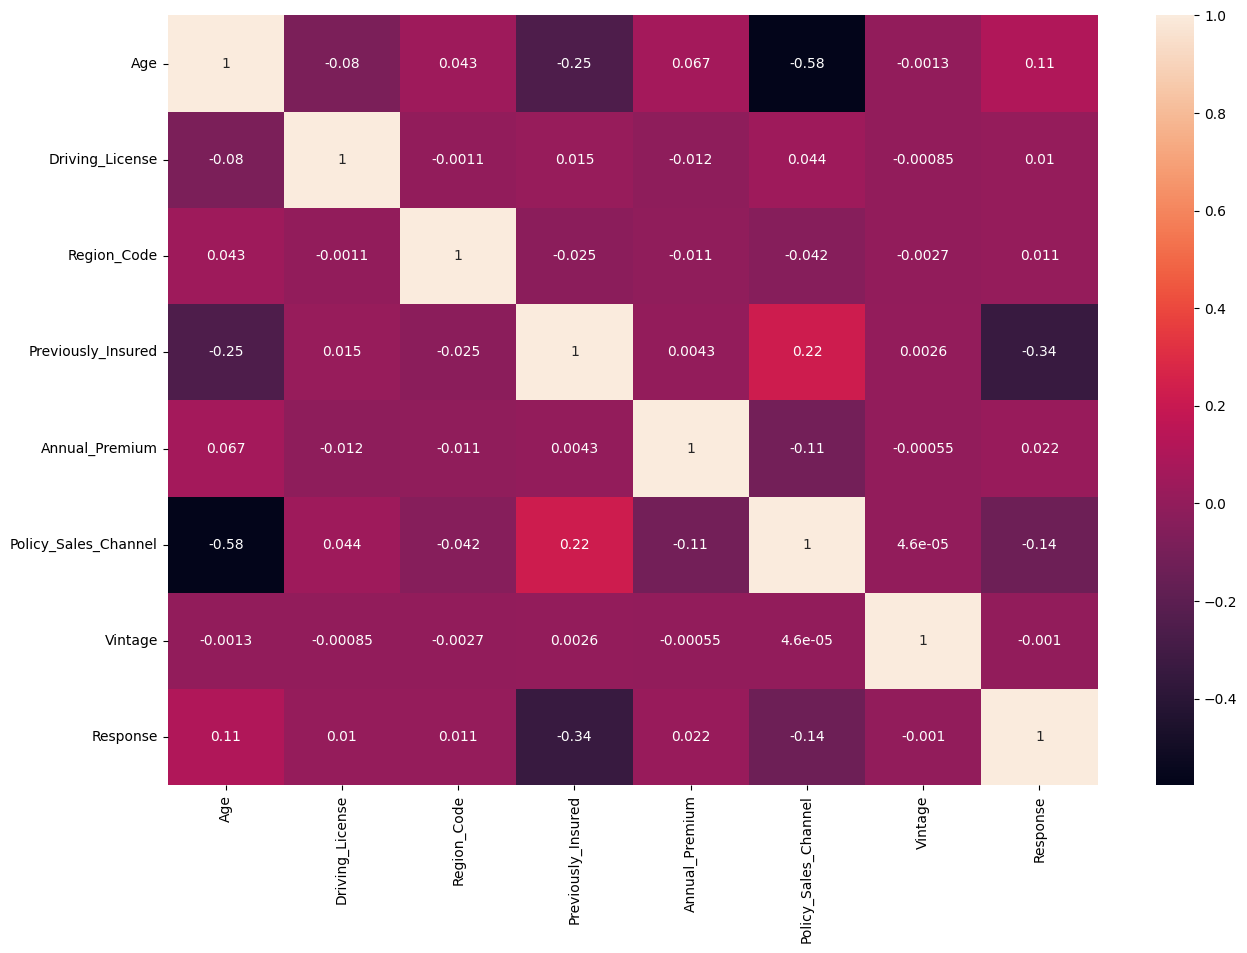

In [23]:
# Correlation Heatmap visualization code
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True)

##### 1. Why did you pick the specific chart?

used correlation heatmap to know the variables collinearity

##### 2. What is/are the insight(s) found from the chart?

policy sales channel and vintage effecting more so i dropped them 


#### Chart - 15 - Pair Plot 

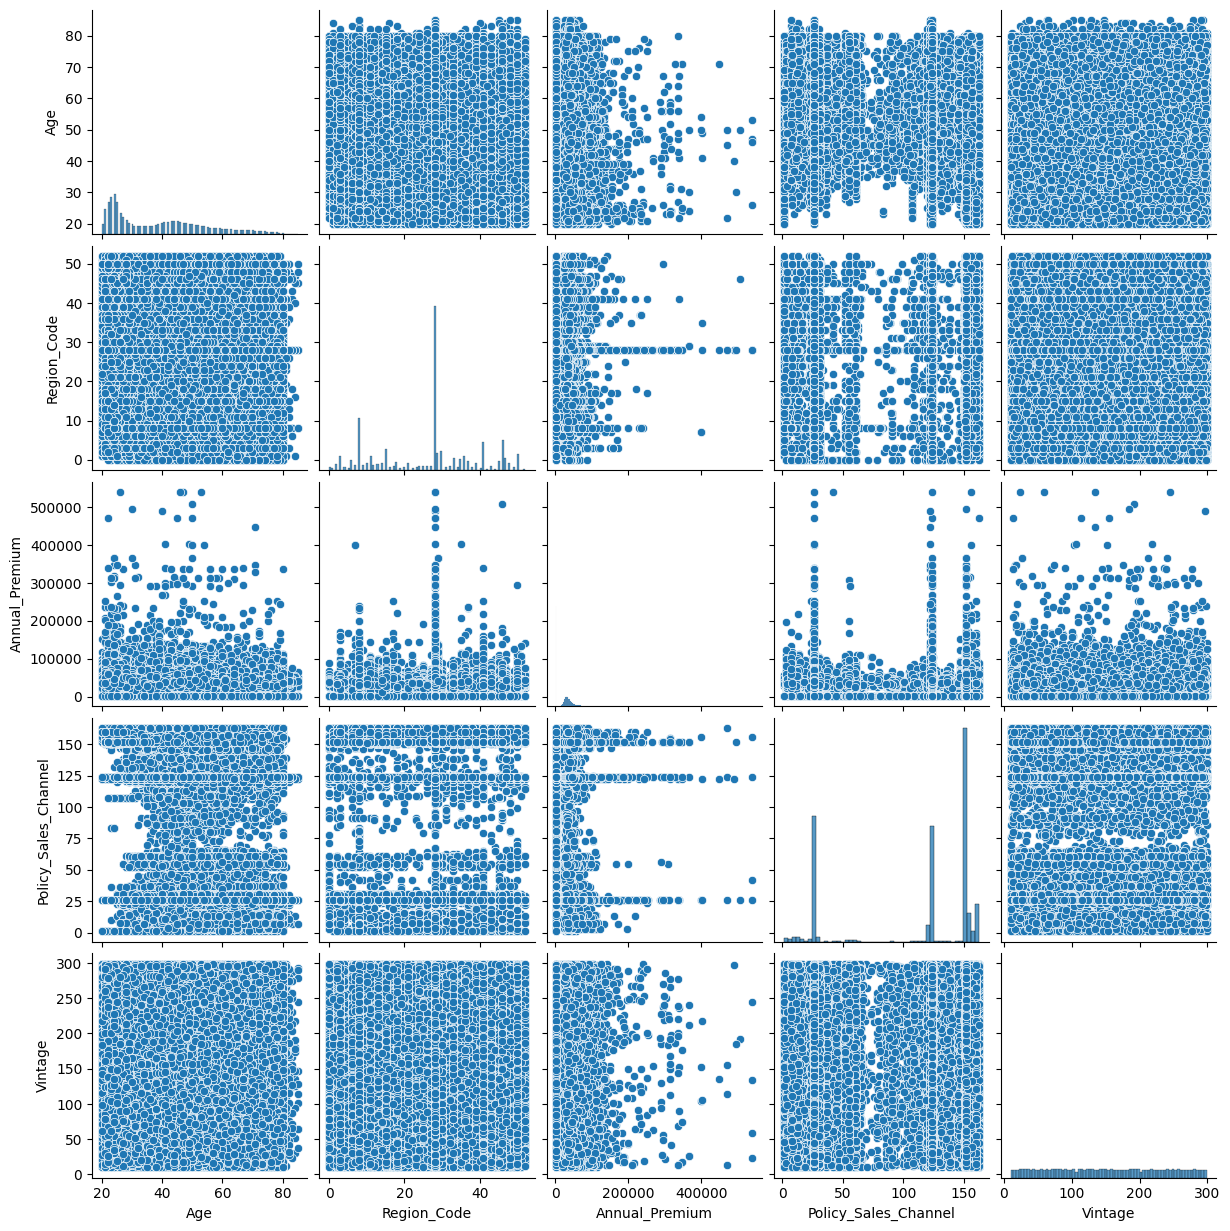

In [24]:
# Pair Plot visualization code
sns.pairplot(df[num_cols])

##### 1. Why did you pick the specific chart?

pairplot of numeric columns

## ***6. Feature Engineering & Data Pre-processing***

### 3. Categorical Encoding

In [25]:
# Encode your categorical columns
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})

df['Vehicle_Age']= df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No':0})

In [26]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

i have directly mapped with numeric values

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [27]:
# Manipulate Features to minimize feature correlation and create new features
df=df.drop(['Policy_Sales_Channel','Vintage'], axis=1) 

### 8. Data Splitting

In [28]:
dependent_variable = df['Response']
independent_variables = list(set(df.columns.tolist()) - {'Response'})
independent_variables

['Vehicle_Damage',
 'Vehicle_Age',
 'Gender',
 'Annual_Premium',
 'Region_Code',
 'Driving_License',
 'Age',
 'Previously_Insured']

In [29]:
# create the independent variable data
X = df[independent_variables].values

# Create the dependent variable data
y = df['Response'].values

In [30]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

##### What data splitting ratio have you used and why? 

i have splitted the data into 80:20 ratio

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

yes,The data is imbalanced so i used smote technique to balance

In [31]:
df['Response'].value_counts()

0    334155
1     46685
Name: Response, dtype: int64

In [32]:
# Handling Imbalanced Dataset (If needed)


# Instantiate SMOTE
smote = SMOTE()

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(534648, 8)
(534648,)


## ***7. ML Model Implementation***

### ML Model - 1

In [33]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGB': XGBClassifier(),
    'KNN': KNeighborsClassifier()}

# Loop over models and fit them to the training data
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Print model name and evaluation metrics
    print('Model:', name)
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))

Model: Logistic Regression
Confusion Matrix:
 [[29092 37739]
 [ 2917  6420]]
ROC AUC Score: 0.5614469938541625
Accuracy Score: 0.4662325385988867
              precision    recall  f1-score   support

           0       0.91      0.44      0.59     66831
           1       0.15      0.69      0.24      9337

    accuracy                           0.47     76168
   macro avg       0.53      0.56      0.41     76168
weighted avg       0.82      0.47      0.55     76168

Model: Decision Tree
Confusion Matrix:
 [[59195  7636]
 [ 6247  3090]]
ROC AUC Score: 0.608341531356437
Accuracy Score: 0.8177318558974898
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66831
           1       0.29      0.33      0.31      9337

    accuracy                           0.82     76168
   macro avg       0.60      0.61      0.60     76168
weighted avg       0.83      0.82      0.82     76168

Model: XGB
Confusion Matrix:
 [[63310  3521]
 [ 7731  1606]]


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

from the above xgb boosting gave good result of 0.85 accuracy

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd


# define parameter grid
param_grid = {
    'n_estimators': [1,3,5],
    
    'max_depth' : [ 3,4,5],
    'min_samples_split' : [2, 4,6],
    'min_samples_leaf' : [1, 2, 4]
}

# define model
model = RandomForestClassifier()


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# print best parameters 
print("Best parameters: ", grid_search.best_params_)



Best parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 5}


In [37]:
y_pred =grid_search.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 0.7236634807268144
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     66831
           1       0.29      0.86      0.43      9337

    accuracy                           0.72     76168
   macro avg       0.63      0.78      0.62     76168
weighted avg       0.89      0.72      0.77     76168



# **Conclusion**

Customers of age between 30 to 60 are more likely to buy insurance.

Customers with Driving License have higher chance of buying Insurance.

Customers with Vehicle_Damage are likely to buy insurance.

The variable such as Previously_insured,Annual_premium are more effecting the target variable.

By comparing accuracy xgb classifier gave 85% accuracy.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***